#Modeling

We are experimenting here with a series of Machine Learning Algorithms. This includes:
 - Linear Model, 
 - Tree Based Models, 
 - Advanced Tree Based Models,
 - a basic Neural Network - Multi-Layer Perceptron
 - Voting Regressor


### Metrics:

Main objective metrics would be:
- mean absolute error
- median absolute error

We would also include below metrics inorder to compare with existing solutions available online:
- mean squared error
- RMSE
- R2 score

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer, MaxAbsScaler
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 70 kB/s 


In [ ]:
from catboost import CatBoostRegressor

## Featuring Datasets

Loading our datasets generated from Feature Engnieering. We have basically two sets here:
- Feature Engineered Core datasets
- Collinearity fixed datasets

We would experiment with both sets



```
Dataset	LR_MAE_Scores	Train Score	Test Score	Collinearity_fixed_set	LR_Mae_cf_set	RF_Mae_cf_set
0	(X_train_imp_df, X_test_imp_df)	2.483691	0.507928	0.502580	(X_train_set1, X_test_set1)	2.621161	1.943551
1	(X_train_class_featured1, X_test_class_featured1)	2.519622	0.502397	0.500335	(X_train_set2, X_test_set2)	2.693106	2.006822
2	(X_train_class_featured2, X_test_class_featured2)	2.518396	0.503019	0.500331	(X_train_set3, X_test_set3)	2.641602	1.943601
3	(X_train_H_featurized_opt, X_test_H_featurized...	2.233118	0.476607	0.459887	(X_train_set4, X_test_set4)	1.675076	1.367600
4	(X_train_H_featurized_1, X_test_H_featurized_1)	1.761836	0.660035	0.686328	(X_train_set5, X_test_set5)	1.947481	1.696396
5	(X_train_H_featurized_2, X_test_H_featurized_2)	2.268199	0.512625	0.504148	(X_train_set6, X_test_set6)	2.621161	1.943551
6	(X_train_featurized_1, X_test_featurized_1)	1.793020	0.653486	0.683489	(X_train_set7, X_test_set7)	2.147761	1.975201
7	(X_train_featurized_2, X_test_featurized_2)	2.290936	0.509025	0.503758	(X_train_set8, X_test_set8)	2.641602	1.943601
```



In [ ]:
#loading y_train and y_test
y_train = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/y_train', squeeze=True)
y_test = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/y_test', squeeze=True)

#### Feature Engineered Core datasets

In [ ]:
#Feature Engineered Core datasets
#loading the dataframes from saved csv

datasets = [('X_train_imp_df', 'X_test_imp_df'), ('X_train_class_featured1', 'X_test_class_featured1'),
 ('X_train_class_featured2', 'X_test_class_featured2'),  ('X_train_H_featurized_opt', 'X_test_H_featurized_opt'),
 ('X_train_H_featurized_1', 'X_test_H_featurized_1'),  ('X_train_H_featurized_2', 'X_test_H_featurized_2'),
 ('X_train_featurized_1', 'X_test_featurized_1'),  ('X_train_featurized_2', 'X_test_featurized_2'),
 ('X_train_featurized_3', 'X_test_featurized_3')]

#numerical columns in this set
num_cols = ['H', 'albedo', 'epoch', 'e', 'a', 'q', 'i', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'data_arc', 'condition_code', 'rms']

#datasets
X_train_imp_df= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_imp_df')
X_test_imp_df= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_imp_df')
X_train_class_featured1= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_class_featured1')
X_test_class_featured1= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_class_featured1')
X_train_class_featured2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_class_featured2')
X_test_class_featured2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_class_featured2')
X_train_H_featurized_opt= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_H_featurized_opt')
X_test_H_featurized_opt= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_H_featurized_opt')
X_train_H_featurized_1= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_H_featurized_1')
X_test_H_featurized_1= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_H_featurized_1')
X_train_H_featurized_2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_H_featurized_2')
X_test_H_featurized_2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_H_featurized_2')
X_train_featurized_1 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_featurized_1')
X_test_featurized_1= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_featurized_1')
X_train_featurized_2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_featurized_2')
X_test_featurized_2= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_featurized_2')
X_train_featurized_3= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_featurized_3')
X_test_featurized_3= pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_featurized_3')

#### Collinearity fixed datasets

In [ ]:
#Feature Engineered Collinearity Fixed datasets
#loading the dataframes from saved csv

collinearity_removed_dataset = [('X_train_set1','X_test_set1'),('X_train_set2','X_test_set2'), ('X_train_set3','X_test_set3'), ('X_train_set4','X_test_set4'),('X_train_set5','X_test_set5'), ('X_train_set6','X_test_set6'), ('X_train_set7','X_test_set7'), ('X_train_set8','X_test_set8'), ('X_train_set9','X_test_set9')]

# numerical columns in below dataset:
num_set1 = ['albedo', 'e', 'i', 'per', 'data_arc', 'condition_code', 'H']
num_set2 = ['albedo', 'e', 'i', 'per', 'moid', 'data_arc', 'condition_code','H']
num_set3 = ['albedo', 'e', 'i', 'per', 'data_arc', 'condition_code', 'H']
num_set4 = ['albedo', 'e', 'i', 'per', 'condition_code', 'H']
num_set5 = ['albedo', 'e', 'i', 'per', 'data_arc', 'condition_code', 'H']
num_set6 = ['albedo', 'e', 'i', 'per', 'data_arc', 'condition_code', 'H']
num_set7 = ['albedo', 'e', 'i', 'per', 'moid', 'condition_code','H']
num_set8 = ['albedo', 'e', 'i', 'per', 'data_arc', 'condition_code', 'H']
num_set9 = ['albedo', 'e', 'i', 'per', 'moid', 'condition_code', 'H']

num_cols_2 = [num_set1, num_set2, num_set3, num_set4, num_set5, num_set6, num_set7, num_set8, num_set9]

##datasets
X_train_set1 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set1')
X_test_set1 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set1')
X_train_set2 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set2')
X_test_set2 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set2')
X_train_set3 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set3')
X_test_set3 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set3')
X_train_set4 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set4')
X_test_set4 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set4')
X_train_set5 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set5')
X_test_set5 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set5')
X_train_set6 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set6')
X_test_set6 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set6')
X_train_set7 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set7')
X_test_set7 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set7')
X_train_set8 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set8')
X_test_set8 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set8')
X_train_set9 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_train_set9')
X_test_set9 = pd.read_csv('/content/drive/MyDrive/project_asteroid/data/X_test_set9')

## Feature Engineering Experiment - Numerical Functional Transformations

Since we plan to experiment with different ML models, and we would experiment with how different models - linear, tree-based, mlp behave with different functional transformation.

- Experimental Dataset: X_train_imp_df, X_test_imp_df
- Experimenting here with sklearn:
  - MinMaxScaler
  - MaxAbsScaler
  - StandardScaler
  - QuantileTransformer-Normal
  - QuantileTransformer-Uniform

- Also using a library feature-engine:
Refs- https://feature-engine.readthedocs.io/en/0.6.x_a/vartransformers/PowerTransformer.html
  - PowerTransformer:  applies power or exponential transformations to numerical variables



In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 71.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine import transformation as vt

In [ ]:
X_train_imp_df.describe()

,H,albedo,epoch,e,a,q,i,ad,n,tp,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
count,97795.000000,97795.000000,9.779500e+04,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,9.779500e+04,...,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000,97795.000000
mean,15.355442,0.129953,2.459762e+06,0.149403,2.826263,2.400304,10.360972,3.252234,0.218735,2.459730e+06,...,0.005481,0.000092,0.000746,0.000348,0.003395,0.913809,0.004356,0.055708,0.013467,0.000102
std,1.413448,0.109637,4.095160e+02,0.081543,1.771660,0.529847,6.874311,3.405896,0.058793,6.664308e+02,...,0.073830,0.009593,0.027311,0.018643,0.058167,0.280647,0.065857,0.229359,0.115264,0.010112
min,3.200000,0.001000,2.455130e+06,0.000600,0.642400,0.081000,0.020000,1.000000,0.000126,2.426218e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.630000,0.053000,2.459800e+06,0.091850,2.549000,2.069000,5.130000,2.890000,0.180800,2.459346e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,15.430000,0.079000,2.459800e+06,0.141800,2.760000,2.367000,9.370000,3.190000,0.215000,2.459746e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,16.230000,0.187000,2.459800e+06,0.194800,3.098000,2.687000,13.730000,3.490000,0.242200,2.460177e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27.500000,1.000000,2.459800e+06,0.984400,393.800000,40.335000,158.550000,781.390000,1.914000,2.463896e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

#instantiating transformers
min_max = MinMaxScaler()
max_abs = MaxAbsScaler()
std_scal = StandardScaler()
quant_u = QuantileTransformer(output_distribution='uniform')
quant_n = QuantileTransformer(output_distribution='normal')
power_trans = vt.PowerTransformer(exp=0.5)


#instantiating algorithms
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(max_depth=2, random_state=42, n_jobs=-1)
svm = SVR()
mlp = MLPRegressor(random_state=42, max_iter=100)

#defining lists to store r2scores for ML algos
r2_lr, r2_dt, r2_rf, r2_svm, r2_mlp = [], [], [], [], []
mae_lr, mae_dt, mae_rf, mae_svm, mae_mlp = [], [], [], [], []

algos = [lr, dt, rf, svm, mlp] 
r2_scores = [r2_lr, r2_dt, r2_rf, r2_svm, r2_mlp]
mae_scores = [mae_lr, mae_dt, mae_rf, mae_svm, mae_mlp]
tranformers = [min_max, max_abs, std_scal, quant_u, quant_n, power_trans]


for i in range(len(algos)):
    # X and y
    train = X_train_imp_df.copy()
    test = X_test_imp_df.copy()
    
    #fitting algorithm and predicting
    algos[i].fit(train, y_train)
    pred = algos[i].predict(test)
    mae = mean_absolute_error(y_test, pred)
    score = r2_score(y_test, pred)
    mae_scores[i].append(mae)
    r2_scores[i].append(score)
    for trans in tranformers:
        # X and y
        train = X_train_imp_df.copy()
        test = X_test_imp_df.copy() 

        #fitting transformation
        trans.fit(train.loc[:,num_cols])
        train.loc[:,num_cols] = trans.transform(train.loc[:,num_cols])
        test.loc[:,num_cols] = trans.transform(test.loc[:,num_cols])
        #print(train.head(1))
        #fitting algorithm and predicting
        algos[i].fit(train, y_train)
        pred = algos[i].predict(test)
        mae = mean_absolute_error(y_test, pred)
        #print("MAE", mae)
        score = r2_score(y_test, pred)
        #print("R2", score)
        mae_scores[i].append(mae)
        r2_scores[i].append(score)

In [ ]:
index = ['NoTransform', 'MinMaxScaler', 'MaxAbsScaler', 'StandardScaler', 'QuantileTransformerUniform', 'QuantileTransformerNormal', 'PowerTransform']
data ={'LR':r2_scores[0], 'DTree':r2_scores[1], 'RForest':r2_scores[2], 'LinearSVR':r2_scores[3], 'MLP':r2_scores[4]}
result= pd.DataFrame(data, index=index)
result

,LR,DTree,RForest,LinearSVR,MLP
NoTransform,0.451986,0.918626,0.753366,-0.010065,-4287.120092
MinMaxScaler,0.451986,0.918722,0.753393,0.482299,0.934229
MaxAbsScaler,0.451986,0.918836,0.753388,0.451333,0.897729
StandardScaler,0.451986,0.918677,0.753373,0.673848,0.951989
QuantileTransformerUniform,0.187864,0.919147,0.753391,0.297857,0.779128
QuantileTransformerNormal,0.241370,0.918805,0.753388,0.450670,0.934056
PowerTransform,0.503278,0.919119,0.753388,0.100839,0.486000


In [ ]:
result.to_csv('/content/drive/MyDrive/project_asteroid/results/transformation_result_r2.csv')

### Observations
- **LinearRegression**: **PowerTransform** is observed to improve the R2 score
- **SVR**: **Standardization** worked well
- **DecisionTree**: There is not much improvement with and without transformation, we do observe that **QuantitleTransformerUniform** display some improvement
- **RandomForest**: There is not much improvement with and without transformation
- **MultiLayerPerceptron**: **Standardization** works well

# Modeling

## 1. Buiding a Baseline Regression Model

- for this we would use mean of y_train as the y_pred

In [ ]:
#mean of y_train
np.mean(y_train)

5.462971230635514

In [ ]:
# computing y_pred_train and test
y_pred_train = np.zeros((y_train.shape)) + np.mean(y_train)

In [ ]:
y_pred_test = np.zeros((y_test.shape)) + np.mean(y_train)

In [ ]:
y_pred_train.shape, y_pred_test.shape

((97795,), (41913,))

In [ ]:
#computing mean absolute error
mae_baseline_train = mean_absolute_error(y_train, y_pred_train)
mae_baseline_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(f"MAE train score for baseline model is: {mae_baseline_train}")
print(f"MAE test score for baseline model is: {mae_baseline_test}")

MAE train score for baseline model is: 3.1204215763948144
MAE test score for baseline model is: 3.1061182026608734


In [ ]:
residuals_base = y_test - y_pred_test

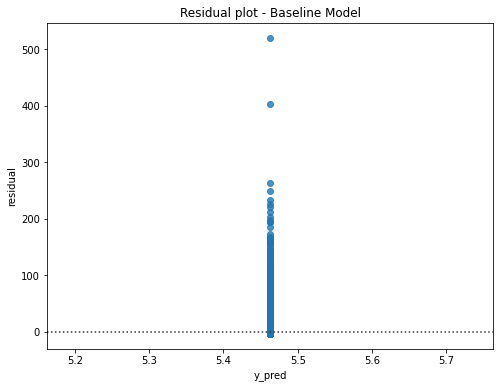

In [ ]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred_test, y=(y_test-y_pred_test),robust=True)
plt.title("Residual plot - Baseline Model")
plt.xlabel("y_pred")
plt.ylabel("residual")
plt.show()

In [ ]:
# model_list = []
# model_list.append("Baseline Model")
# mae_scores = []
# mae_scores.append(mae_baseline_train)
# Train_score=[]
# Test_score=[]


## 2. Trying out Linear and Tree Based Model without any hyperparameter Tuning

In [ ]:
def basic_modeling(datasets, model, transformer=None):
    """function to fit and predict"""
    _mae_scores_dataset_1 =[]
    _med_scores_dataset_1 =[]
    _mse_scores_dataset_1 =[]
    _r2_scores_train_1 =[]
    _r2_scores_test_1 =[]
    _rmse_scores_1 = []
    for dataset in datasets:
          ## transformation
          train_data = eval(dataset[0]).copy()
          test_data = eval(dataset[1]).copy()

          if transformer != None:
              #fitting transformation
              transformer.fit(train.loc[:,num_cols])
              train.loc[:,num_cols] = transformer.transform(train.loc[:,num_cols])
              test.loc[:,num_cols] = transformer.transform(test.loc[:,num_cols])

          ## modelling
          model.fit(train_data, y_train)
          train_pred = model.predict(train_data)
          pred = model.predict(test_data)
          _mae_scores_dataset_1.append(mean_absolute_error(y_test, pred))
          _med_scores_dataset_1.append(median_absolute_error(y_test, pred))
          _mse_scores_dataset_1.append(mean_squared_error(y_test, pred))
          _rmse_scores_1.append(mean_squared_error(y_test, pred, squared=False))
          _r2_scores_train_1.append(r2_score(y_train, train_pred))
          _r2_scores_test_1.append(r2_score(y_test, pred))

    result_summary = pd.DataFrame({'Datasets':datasets, 'mean_absolute_error':_mae_scores_dataset_1, 'median_absolute_error':_med_scores_dataset_1, 'mean_squared_error':_mse_scores_dataset_1, 'RMSE':_rmse_scores_1, 'R2_Train':_r2_scores_train_1, 'R2_Test':_r2_scores_test_1})
    return result_summary

#DATASET_Set_1 - Feature Engineered Core datasets
These are catergorical encoded and missing imputed and/or with engineered 'H' or engineered 'orbit class' or both

## Linear Regression

In [ ]:
model = LinearRegression()
transformer = StandardScaler()
result_lr = basic_modeling(datasets, model, transformer=transformer)

In [ ]:
result_lr

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_imp_df, X_test_imp_df)",2.519004,1.580853,42.850311,6.546015,0.517023,0.451986
1,"(X_train_class_featured1, X_test_class_featured1)",2.582081,1.635183,41.976331,6.478914,0.511893,0.463163
2,"(X_train_class_featured2, X_test_class_featured2)",2.582278,1.649172,42.254386,6.500337,0.513076,0.459607
3,"(X_train_H_featurized_opt, X_test_H_featurized...",2.243917,1.198442,45.648121,6.756339,0.484253,0.416205
4,"(X_train_H_featurized_1, X_test_H_featurized_1)",1.793382,1.035130,28.530647,5.341409,0.669721,0.635121
5,"(X_train_H_featurized_2, X_test_H_featurized_2)",2.275417,1.205021,41.981110,6.479283,0.519861,0.463102
6,"(X_train_featurized_1, X_test_featurized_1)",1.848656,1.081796,28.326758,5.322289,0.664340,0.637728
7,"(X_train_featurized_2, X_test_featurized_2)",2.321201,1.263101,41.821193,6.466931,0.517947,0.465148
8,"(X_train_featurized_3, X_test_featurized_3)",2.339326,1.287113,44.909760,6.701474,0.477141,0.425648


## Decision Tree

In [ ]:
model = DecisionTreeRegressor()
result_dt = basic_modeling(datasets, model, transformer=None)

In [ ]:
result_dt

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_imp_df, X_test_imp_df)",0.590177,0.304,7.001477,2.646030,1.0,0.910458
1,"(X_train_class_featured1, X_test_class_featured1)",0.588562,0.302,6.960317,2.638241,1.0,0.910984
2,"(X_train_class_featured2, X_test_class_featured2)",0.583678,0.303,3.062917,1.750119,1.0,0.960828
3,"(X_train_H_featurized_opt, X_test_H_featurized...",0.991211,0.358,65.249759,8.077732,1.0,0.165519
4,"(X_train_H_featurized_1, X_test_H_featurized_1)",1.471117,0.789,34.653800,5.886748,1.0,0.556812
5,"(X_train_H_featurized_2, X_test_H_featurized_2)",1.467652,0.780,33.981009,5.829323,1.0,0.565416
6,"(X_train_featurized_1, X_test_featurized_1)",1.470434,0.787,33.791458,5.813042,1.0,0.567840
7,"(X_train_featurized_2, X_test_featurized_2)",1.472058,0.788,35.006601,5.916638,1.0,0.552300
8,"(X_train_featurized_3, X_test_featurized_3)",0.993472,0.358,65.943110,8.120536,1.0,0.156652


## RandomForest

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
result_rf = basic_modeling(datasets, model, transformer=None)

In [ ]:
result_rf

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_imp_df, X_test_imp_df)",0.401086,0.20950,2.343867,1.530969,0.994193,0.970024
1,"(X_train_class_featured1, X_test_class_featured1)",0.401180,0.20852,2.107293,1.451652,0.992392,0.973050
2,"(X_train_class_featured2, X_test_class_featured2)",0.400319,0.20946,2.023890,1.422635,0.991100,0.974116
3,"(X_train_H_featurized_opt, X_test_H_featurized...",0.712682,0.25295,24.731257,4.973053,0.967163,0.683711
4,"(X_train_H_featurized_1, X_test_H_featurized_1)",1.057427,0.56894,14.753793,3.841067,0.966765,0.811313
5,"(X_train_H_featurized_2, X_test_H_featurized_2)",1.052171,0.56257,15.440908,3.929492,0.957198,0.802526
6,"(X_train_featurized_1, X_test_featurized_1)",1.059867,0.57021,16.195314,4.024340,0.961468,0.792878
7,"(X_train_featurized_2, X_test_featurized_2)",1.052407,0.56378,16.672064,4.083144,0.958800,0.786780
8,"(X_train_featurized_3, X_test_featurized_3)",0.706084,0.25353,21.262644,4.611143,0.962473,0.728071


# DATASET_Set_2: Collinearity fixed Datasets
are subsets of the above Core Datasets with all highly collinear features removed

## Linear Regression

In [ ]:
model = LinearRegression()
transformer = StandardScaler()
result_lr_cf = basic_modeling(collinearity_removed_dataset, model, transformer=transformer)

In [ ]:
result_lr_cf

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_set1, X_test_set1)",2.424977,1.428085,44.359437,6.660288,0.468400,0.432686
1,"(X_train_set2, X_test_set2)",2.563395,1.593767,41.899720,6.472999,0.460103,0.464143
2,"(X_train_set3, X_test_set3)",2.454822,1.492546,41.557274,6.446493,0.427442,0.468523
3,"(X_train_set4, X_test_set4)",1.650721,0.676303,52.852820,7.269994,0.363442,0.324064
4,"(X_train_set5, X_test_set5)",1.962012,1.159671,29.294989,5.412485,0.620465,0.625346
5,"(X_train_set6, X_test_set6)",2.348748,1.256262,44.030684,6.635562,0.467529,0.436890
6,"(X_train_set7, X_test_set7)",2.160515,1.322873,29.023797,5.387374,0.603833,0.628814
7,"(X_train_set8, X_test_set8)",2.354617,1.263143,41.320338,6.428090,0.424855,0.471553
8,"(X_train_set9, X_test_set9)",1.832891,0.878397,50.186674,7.084255,0.347509,0.358161


In [ ]:
# experimenting with power transformer numerical transformation
model = LinearRegression()
transformer = vt.PowerTransformer(exp=0.5)
result_lr_cf1 = basic_modeling(collinearity_removed_dataset, model, transformer=transformer)

In [ ]:
result_lr_cf1

## DecisionTree

In [ ]:
model = DecisionTreeRegressor()
result_dt_cf = basic_modeling(collinearity_removed_dataset, model, transformer=None)

In [ ]:
result_dt_cf

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_set1, X_test_set1)",0.585863,0.305,6.637805,2.576394,1.0,0.915109
1,"(X_train_set2, X_test_set2)",0.582296,0.304,6.445541,2.538807,1.0,0.917568
2,"(X_train_set3, X_test_set3)",0.578361,0.304,2.518952,1.587121,1.0,0.967785
3,"(X_train_set4, X_test_set4)",1.458019,0.367,94.146154,9.702894,1.0,-0.204038
4,"(X_train_set5, X_test_set5)",1.811573,0.986,63.247679,7.952841,1.0,0.191124
5,"(X_train_set6, X_test_set6)",1.767421,0.956,55.346780,7.439542,1.0,0.292168
6,"(X_train_set7, X_test_set7)",2.653086,1.461,53.525141,7.316088,1.0,0.315465
7,"(X_train_set8, X_test_set8)",1.792447,0.958,67.843246,8.236701,1.0,0.132351
8,"(X_train_set9, X_test_set9)",1.460572,0.363,78.810810,8.877545,1.0,-0.007914


## RandomForest

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
result_rf_cf = basic_modeling(collinearity_removed_dataset, model, transformer=None)

In [ ]:
result_rf_cf

,Datasets,mean_absolute_error,median_absolute_error,mean_squared_error,RMSE,R2_Train,R2_Test
0,"(X_train_set1, X_test_set1)",0.408991,0.21303,3.178942,1.782959,0.993933,0.959344
1,"(X_train_set2, X_test_set2)",0.405348,0.21360,1.745838,1.321302,0.994868,0.977672
2,"(X_train_set3, X_test_set3)",0.408845,0.21424,2.643048,1.625745,0.993961,0.966198
3,"(X_train_set4, X_test_set4)",1.164812,0.26977,49.651173,7.046359,0.899416,0.365010
4,"(X_train_set5, X_test_set5)",1.323803,0.74033,16.294150,4.036601,0.954714,0.791614
5,"(X_train_set6, X_test_set6)",1.279935,0.71489,18.784573,4.334117,0.957233,0.759764
6,"(X_train_set7, X_test_set7)",1.979899,1.22663,25.608430,5.060477,0.941915,0.672493
7,"(X_train_set8, X_test_set8)",1.274010,0.71729,16.537656,4.066652,0.953353,0.788499
8,"(X_train_set9, X_test_set9)",1.149596,0.27046,46.358578,6.808713,0.917079,0.407119


## Observations from Basic Modeling Step:
Keeping in context all metrics:
- With Linear Regression, Set-5 from both Datasets gives the best result
- with DecisionTree and RandomForest, Set-2 and Set-3 from both Datasets seems to give the best results